In [1]:
from itertools import cycle, islice

In [2]:
from sklearn import mixture
from sklearn import metrics
from sklearn.cluster import KMeans

In [3]:
import numpy as np
from scipy.stats import kde
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [87]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import kde

In [4]:
sns.set(color_codes=True)

In [5]:
def load_data_file(filename):

    with open(filename) as file:
        context = file.read()
        size = len(context)
        arraystr= context[1:size-1]
        arraystr = arraystr.split(',')
        region_means = [float(item) for item in arraystr]
        return region_means

In [6]:
wga_mean_tuf_I_file = "/home/a/ag568/wga_windows_mean_0_TUF_DETAIL_I.txt"
no_wga_mean_tuf_I_file = "/home/a/ag568/no_wga_windows_mean_0_TUF_DETAIL_I.txt"
gc_tuf_I_file = "/home/a/ag568/windows_gc_0_TUF_DETAIL_I.txt"

wga_mean_tuf_II_file = "/home/a/ag568/wga_windows_mean_0_TUF_DETAIL_II.txt"
no_wga_mean_tuf_II_file = "/home/a/ag568/no_wga_windows_mean_0_TUF_DETAIL_II.txt"
gc_tuf_II_file = "/home/a/ag568/windows_gc_0_TUF_DETAIL_II.txt"

wga_mean_single_copy_deletion_file = "/home/a/ag568/wga_windows_mean_0_SINGLE_COPY_DELETION.txt"
no_wga_mean_single_copy_deletion_file = "/home/a/ag568/no_wga_windows_mean_0_SINGLE_COPY_DELETION.txt"
gc_single_copy_deletion_file = "/home/a/ag568/windows_gc_0_SINGLE_COPY_DELETION.txt"

wga_mean_duplication_file = "/home/a/ag568/wga_windows_mean_0_DUPLICATION.txt"
no_wga_mean_duplication_file = "/home/a/ag568/no_wga_windows_mean_0_DUPLICATION.txt"
gc_duplication_file = "/home/a/ag568/windows_gc_0_DUPLICATION.txt"

wga_mean_delete_file = "/home/a/ag568/wga_windows_mean_0_DELETE.txt"
no_wga_mean_delete_file = "/home/a/ag568/no_wga_windows_mean_0_DELETE.txt"
gc_delete_file = "/home/a/ag568/windows_gc_0_DELETE.txt"


In [7]:
wga_mu_tuf_I = load_data_file(filename=wga_mean_tuf_I_file)
no_wga_mu_tuf_I = load_data_file(filename=no_wga_mean_tuf_I_file)
gc_tuf_I = load_data_file(filename=gc_tuf_I_file)

In [8]:
wga_mu_tuf_II = load_data_file(filename=wga_mean_tuf_II_file)
no_wga_mu_tuf_II = load_data_file(filename=no_wga_mean_tuf_II_file)
gc_tuf_II = load_data_file(filename=gc_tuf_II_file)

In [9]:
wga_mu_single_copy_deletion = load_data_file(filename=wga_mean_single_copy_deletion_file)
no_wga_mu_single_copy_deletion = load_data_file(filename=no_wga_mean_single_copy_deletion_file)
gc_single_copy_deletion = load_data_file(filename=gc_single_copy_deletion_file)

In [10]:
wga_mu_duplication = load_data_file(filename=wga_mean_duplication_file)
no_wga_mu_duplication = load_data_file(filename=no_wga_mean_duplication_file)
gc_duplication = load_data_file(filename=gc_duplication_file)

In [11]:
wga_mu_delete = load_data_file(filename=wga_mean_delete_file)
no_wga_mu_delete = load_data_file(filename=no_wga_mean_delete_file)
gc_delete = load_data_file(filename=gc_delete_file)

In [16]:
# mix the data together

# WGA sample
wga_mu = []
wga_mu.extend(wga_mu_tuf_I)
wga_mu.extend(wga_mu_tuf_II)
wga_mu.extend(wga_mu_single_copy_deletion)
wga_mu.extend(wga_mu_duplication)
wga_mu.extend(wga_mu_delete)


# NO-WGA sample
no_wga_mu = []
no_wga_mu.extend(no_wga_mu_tuf_I)
no_wga_mu.extend(no_wga_mu_tuf_II)
no_wga_mu.extend(no_wga_mu_single_copy_deletion)
no_wga_mu.extend(no_wga_mu_duplication)
no_wga_mu.extend(no_wga_mu_delete)


# GC
gc = []
gc.extend(gc_tuf_I)
gc.extend(gc_tuf_II)
gc.extend(gc_single_copy_deletion)
gc.extend(gc_duplication)
gc.extend(gc_delete)


In [17]:
print("Size of WGA sample {0}".format(len(wga_mu)))
print("WGA max: {0}".format(max(wga_mu)))
print("WGA min: {0}".format(min(wga_mu)))
print("WGA mean: {0}".format(np.mean(wga_mu)))
print("WGA var: {0}".format(np.var(wga_mu)))

Size of WGA sample 22828
WGA max: 50.64
WGA min: 0.0
WGA mean: 16.96066935342562
WGA var: 79.69498160908881


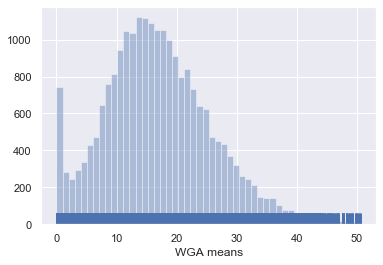

In [18]:
sns.distplot(wga_mu, bins=50, kde=False, rug=True)
plt.xlabel("WGA means")
plt.show()

In [19]:
print("NO-WGA size {0}".format(len(no_wga_mu)))
print("NO-WGA max: {0}".format(max(no_wga_mu)))
print("NO-WGA min: {0}".format(min(no_wga_mu)))
print("NO-WGA mean: {0}".format(np.mean(no_wga_mu)))
print("NO-WGA var: {0}".format(np.var(no_wga_mu)))

NO-WGA size 22828
NO-WGA max: 60.94
NO-WGA min: 0.0
NO-WGA mean: 17.754193534256178
NO-WGA var: 63.825826294592865


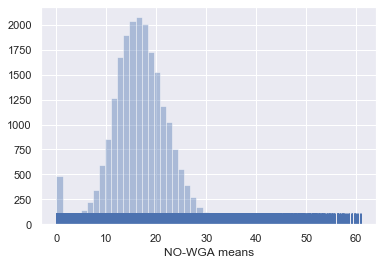

In [20]:
sns.distplot(no_wga_mu, bins=50, kde=False, rug=True)
plt.xlabel("NO-WGA means")
plt.show()

In [21]:
X = np.stack((no_wga_mu, wga_mu), axis=0)
cov = np.cov(X)
print("Covariance matrix: \n", cov)

v, w = linalg.eigh(cov)
print(" Eigenvalues: \n", v)
print(" Eigenvectors: \n", w)

Covariance matrix: 
 [[63.82862236 27.16802696]
 [27.16802696 79.69847287]]
 Eigenvalues: 
 [ 43.46046072 100.06663451]
 Eigenvectors: 
 [[-0.80011108  0.59985187]
 [ 0.59985187  0.80011108]]


In [22]:
ratio = []
for no_wga, wga  in zip(no_wga_mu, wga_mu):
    ratio.append((wga + 1)/(no_wga + 1))
    
ratio = np.array(ratio)
print("NaN in ratio: ", np.any(np.isnan(ratio)))
print("Max ratio: ", max(ratio))
print("Min ratio: ", min(ratio))
X = np.stack((no_wga_mu, wga_mu, ratio), axis=0)
cov = np.cov(X)
print("Covariance matrix: \n", cov)

v, w = linalg.eigh(cov)
print(" Eigenvalues: \n", v)
print(" Eigenvectors: \n", w)

NaN in ratio:  False
Max ratio:  6.22
Min ratio:  0.044762757385854966
Covariance matrix: 
 [[63.82862236 27.16802696 -1.44689508]
 [27.16802696 79.69847287  3.30204474]
 [-1.44689508  3.30204474  0.31124794]]
 Eigenvalues: 
 [5.28680172e-02 4.36872448e+01 1.00098230e+02]
 Eigenvectors: 
 [[ 0.04707821  0.79938864 -0.59896699]
 [-0.05740373 -0.59647577 -0.80057571]
 [ 0.99724042 -0.07207261 -0.01780688]]


In [23]:
pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
print("Pearson correlation: ", pearson)

Pearson correlation:  0.3809126223893838


In [24]:
print("GC size {0}".format(len(gc)))
print("GC max: {0}".format(max(gc)))
print("GC min: {0}".format(min(gc)))
print("GC mean: {0}".format(np.mean(gc)))
print("GC var: {0}".format(np.var(gc)))

GC size 22828
GC max: 0.94
GC min: 0.0
GC mean: 0.4605195374101981
GC var: 0.014738454454455714


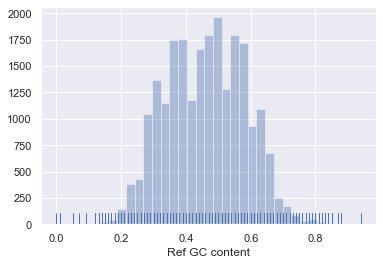

In [25]:
sns.distplot(gc, bins=35, kde=False, rug=True)
plt.xlabel("Ref GC content")
plt.show()

In [27]:
def make_data_array(wga_mu, no_wga_mu, gc, use_ratio, use_gc):
    data = []
    
    if use_ratio and use_gc:
        for no_wga_val, wga_val,gc_val in zip(no_wga_mu, wga_mu, gc):
            data.append([no_wga_val, wga_val, (wga_val + 1)/(no_wga_val + 1), gc_val])
    elif use_ratio:
        for no_wga, wga  in zip(no_wga_mu, wga_mu):
            data.append([no_wga, wga,  (wga + 1)/(no_wga + 1)])
    elif use_gc:
        
        for no_wga_val, wga_val , gc_val in zip(no_wga_mu, wga_mu,  gc):
            data.append([no_wga_val, wga_val, gc_val])
    else:
        
        for no_wga, wga  in zip(no_wga_mu, wga_mu):
            data.append([no_wga, wga ])
        
    return data

In [170]:
def kmeans_clustering(clusters, data, no_wga_mu, wga_mu):
    for nclusters in clusters:
    
        print("Number of clusters ", nclusters)
        kmeans = KMeans(n_clusters=nclusters)
        kmeans.fit(X=data)
        labels = kmeans.labels_
        centers = np.array(kmeans.cluster_centers_)

        calinski_harabasz_score = metrics.calinski_harabasz_score(data, labels)
        print("Calinski score: ", calinski_harabasz_score)
        davies_bouldin_score = metrics.davies_bouldin_score(data, labels)
        print("Davies score: ", davies_bouldin_score)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                          int(max(labels) + 1))))

        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        
        fig, axes = plt.subplots(ncols=1, nrows=1)# figsize=(6, 6))

        axes.scatter(no_wga_mu, wga_mu,  color=colors[labels])
        
        kernel= kde.gaussian_kde(np.vstack([no_wga_mu, wga_mu]))
        xi, yi = np.mgrid[min(no_wga_mu):max(no_wga_mu):nbins*1j, 
                          min(wga_mu):max(wga_mu):nbins*1j]
        
        zi = kernel(np.vstack([xi.flatten(), yi.flatten()]))
        axes.contour(xi, yi, zi.reshape(xi.shape) )
        #axes[1].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='Blues')
        
        axes.set_xlabel("NO-WGA ")
        axes.set_ylabel("WGA")
        plt.show()

In [171]:
def gmm_clustering(clusters, data, cov_type, tol, max_itrs, n_init, no_wga_mu, wga_mu):
    
    for nclusters in clusters:
    
        print("Number of clusters ", nclusters)
        gmm = mixture.GaussianMixture(n_components=nclusters,
                                      covariance_type=cov_type,
                                      tol=tol, max_iter=max_itrs,
                                     n_init=n_init)
        gmm.fit(data)
        print("Converged: ", gmm.converged_)
        print("BIC: ", gmm.bic(data))
        labels = gmm.predict(data)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                          int(max(labels) + 1))))


        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])

        plt.scatter(no_wga_mu, wga_mu,  color=colors[labels])
        
        kernel= kde.gaussian_kde(np.vstack([no_wga_mu, wga_mu]))
        xi, yi = np.mgrid[min(no_wga_mu):max(no_wga_mu):nbins*1j, 
                          min(wga_mu):max(wga_mu):nbins*1j]
        zi = kernel(np.vstack([xi.flatten(), yi.flatten()]))
        #plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='Blues')
        plt.contour(xi, yi, zi.reshape(xi.shape) )
        
        plt.xlabel("NO-WGA ")
        plt.ylabel("WGA")
        plt.show()

In [172]:
N_CLUSTERS = [5]

## Two Means

In [173]:
data = make_data_array(wga_mu=wga_mu, 
                       no_wga_mu=no_wga_mu, gc=None, 
                       use_ratio=False, use_gc=False)

data = np.array(data)

assert data.shape == (len(wga_mu), 2)

### KMeans

Number of clusters  5
Calinski score:  17463.66370747587
Davies score:  0.8796613116852852


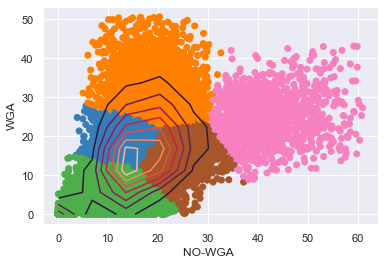

In [174]:
kmeans_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### GMM

#### ```full```

Number of clusters  5
Converged:  True
BIC:  306243.04008930275


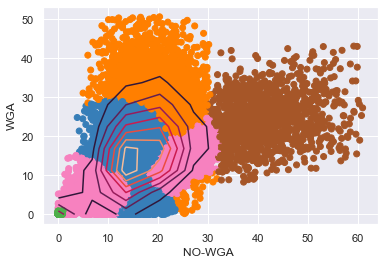

In [110]:
gmm_clustering(clusters=N_CLUSTERS, data=data, 
               tol=1.0e-5, max_itrs=300, n_init=1, 
               cov_type='full',
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

#### ```tied```

Number of clusters  5
Converged:  True
BIC:  310382.0371023983


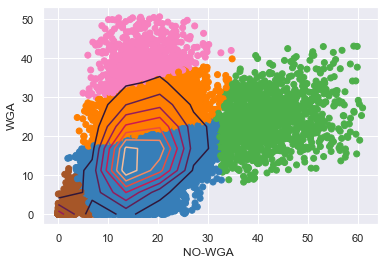

In [111]:
gmm_clustering(clusters=N_CLUSTERS, data=data, 
               tol=1.0e-5, cov_type='tied',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

#### ```diag```

Number of clusters  5
Converged:  True
BIC:  306744.4953795072


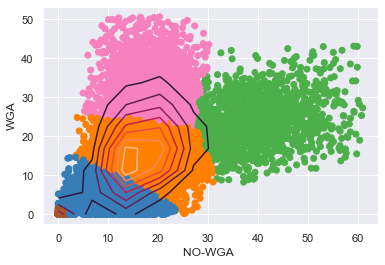

In [112]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, 
               cov_type='diag',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

#### ```spherical```

Number of clusters  5
Converged:  True
BIC:  307317.3322370235


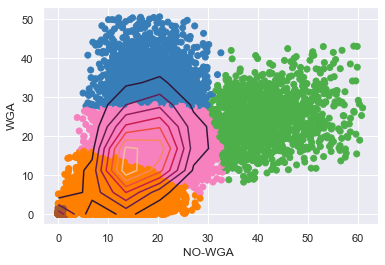

In [113]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, 
               cov_type='spherical',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

## Two means + Ratio

In [114]:
data = make_data_array(wga_mu=wga_mu, 
                       no_wga_mu=no_wga_mu, gc=None, 
                       use_ratio=True, use_gc=False)

data = np.array(data)

assert data.shape == (len(wga_mu), 3)

### KMeans

Number of clusters  5
Calinski score:  17409.66424817163
Davies score:  0.8795985710528507


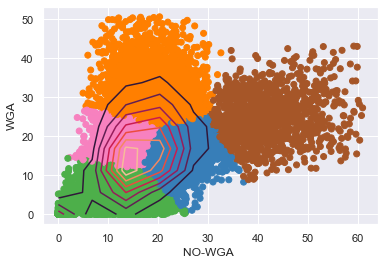

In [115]:
kmeans_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### GMM

#### ```full```

Number of clusters  5
Converged:  True
BIC:  235266.35349685932


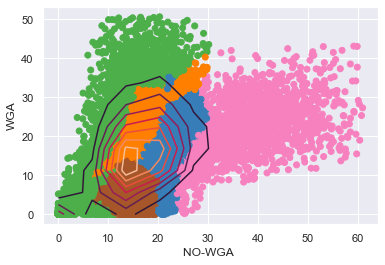

In [116]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='full',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

#### ```tied```

Number of clusters  5
Converged:  True
BIC:  302990.62219358643


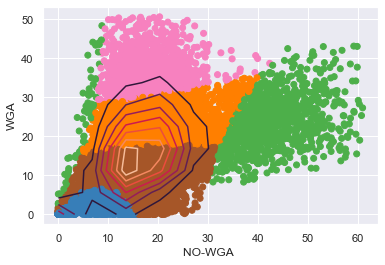

In [117]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-3, cov_type='tied',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

#### ```diag```

Number of clusters  5
Converged:  True
BIC:  322167.8672658592


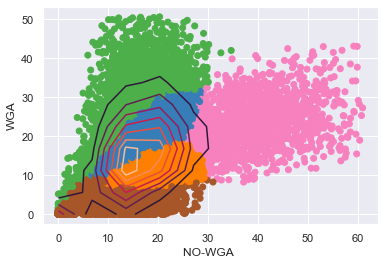

In [118]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, 
               cov_type='diag',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

#### ```spherical```

Number of clusters  5
Converged:  True
BIC:  412966.1225779151


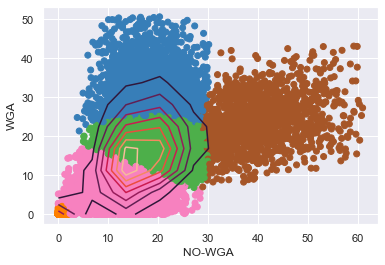

In [119]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, 
               cov_type='spherical', 
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)